## 1.4

   mode  year  acousticness  ...   valence  popularity  key
0     1  1921      0.886896  ...  0.379327    0.653333    2
1     1  1922      0.938592  ...  0.535549    0.140845   10
2     1  1923      0.957247  ...  0.625492    5.389189    0
3     1  1924      0.940200  ...  0.663725    0.661017   10
4     1  1925      0.962607  ...  0.621929    2.604317    5
5     1  1926      0.660817  ...  0.436910    1.422351    9
6     1  1927      0.936179  ...  0.659700    0.801626    7
7     1  1928      0.938617  ...  0.495713    1.525773    1
8     1  1929      0.601427  ...  0.636530    0.340336    7
9     1  1930      0.936715  ...  0.616238    0.926715    2

[10 rows x 14 columns]
   Unnamed: 0                track_id  ... time_signature track_genre
0           0  5SuOikwiRyPMVoIQDJUgSV  ...              4    acoustic
1           1  4qPNDBW1i3p13qLCt0Ki3A  ...              4    acoustic
2           2  1iJBSr7s7jYXzM8EGcbK5b  ...              4    acoustic
3           3  6lfxq3CG4xtTiEg7opyCy

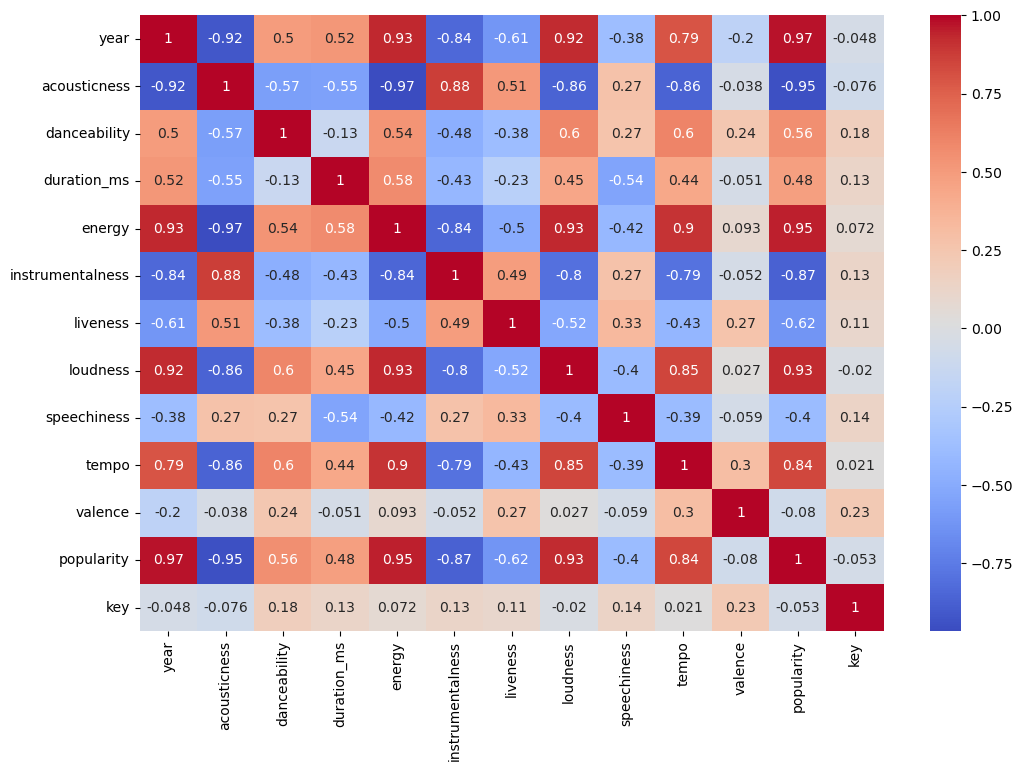

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasetSmall = pd.read_csv("data_by_year_o.csv")
datasetLarge = pd.read_csv("dataset.csv.zip")

print(datasetSmall.head(10))
print(datasetLarge.head(10))

print(datasetSmall.describe())
print(datasetLarge.describe())

datasetSmall.drop(columns=['mode'], inplace=True)
datasetLarge.drop(columns=['Unnamed: 0', 'track_id'], inplace = True)

import statsmodels.api as sm

Xsmall= datasetSmall['tempo']
ySmall = datasetSmall['popularity']

model = sm.OLS(ySmall, Xsmall).fit()
model.summary()

corrMatrixSmall = datasetSmall.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrMatrixSmall, annot = True, cmap = 'coolwarm')
plt.show()

print(datasetLarge.dtypes)
toCategoricalCols = datasetLarge.dtypes[datasetLarge.dtypes == 'object' or datasetLarge.dtypes == 'bool'].index.to_list()
for col in toCategoricalCols:
    datasetLarge[col] = datasetLarge[col].astype('category')
datasetLargeEncoded = pd.get_dummies(datasetLarge, columns = toCategoricalCols, drop_first=True)

Xlarge = datasetLarge['tempo']
yLarge = datasetLarge['popularity']

model = sm.OLS(yLarge, Xlarge).fit()
model.summary()

corrMatrixLarge = datasetLarge.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corrMatrixLarge, annot = True, cmap = 'coolwarm')
plt.show()





